
# Mini Proyecto 3 de Simulación: Proceso de poisson
### Alejandro Tejada 17584
### Diego Sevilla 17238
#### Curso: Simulación
#### Fecha: 09/2020

El proceso de Poisson se puede utilizar para modelar el número de ocurrencias de eventos. Tomemos las llegadas de pacientes a una sala de emergencias x. Esto sucede durante un cierto período de tiempo, como 24 horas, asumiendo que se conoce la ocurrencia promedio de esos eventos durante un período de tiempo. Por poner un ejemplo, un promedio de 10 pacientes ingresan a la sala de emergencias por hora.

Una forma conveniente de comprobar si dos distribuciones difieren entre si es utilizando la prueba de Kolmogorov–Smirnov que en terminos generales se trata de la diferencia mas grande entre ambas distribuciones.

poissonprocess2dists.png

En el siguiente modulos calculamos la pueba de KS para dos procesos de Poisson con diferentes conjuntos de parámetros:

<ipython-input-15-69af12df60bc>:8: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  H1,_ = np.histogram(X , bins=bins, normed=True)
<ipython-input-15-69af12df60bc>:9: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  H2,_ = np.histogram(X2, bins=bins, normed=True)


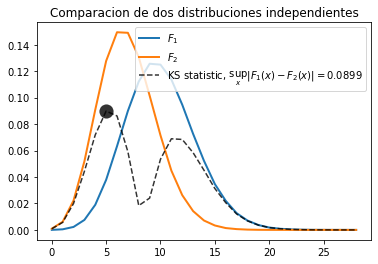

In [15]:
import numpy as np

N = 10**6
X  = np.random.poisson(10, size=N)
X2 = np.random.poisson(7, size=N)

bins = np.arange(0, 30,1)
H1,_ = np.histogram(X , bins=bins, normed=True)
H2,_ = np.histogram(X2, bins=bins, normed=True)

D = np.abs(H1-H2)

idx = np.argmax(D)
KS = D[idx]

# Graficamos resultados
import pylab as plt
plt.plot(H1, lw=2,label="$F_1$")
plt.plot(H2, lw=2,label="$F_2$")
text = r"KS statistic, $\sup_x |F_1(x) - F_2(x)| = {KS:.4f}$"
plt.plot(D, '--k', label=text.format(KS=KS),alpha=.8)
plt.scatter([bins[idx],],[D[idx],],s=200,lw=0,alpha=.8,color='k')
plt.title("Comparacion de dos distribuciones independientes")
plt.axis('tight')
plt.legend()

Los procesos de Poisson variables constituyentes X1, X2, X3,… Xk tienen todos una distribución de Poisson, que viene dada por la Función de masa de probabilidad:

masProbabilidad.png

La fórmula anterior nos da la probabilidad de ocurrencia de k eventos en unidad de tiempo, dado que la tasa de ocurrencia promedio es λ eventos por unidad de tiempo.

### Simulación de tiempos en pruebas de estres y proyecciones en un proceso de Poisson

Ahora tenemos suficiente información para generar los tiempos aproximados. Hacemos esto usando la técnica Inverse-CDF, en la que literalmente construimos la función inversa de la CDF, y la alimentamos con diferentes valores de probabilidad de una distribución Uniforme (0,1). Esto nos da los tiempos correspondientes para las respectivas probabilidades.

inverseCDF.png

#### Simulacion y parametros de entrada

In [4]:
import random
import math
import statistics
import matplotlib.pyplot as plt

# Proveedores
prov_1 = 100
periodo = 2
sol_min = 2400
sol_3min = 6000

_lambda = 5
_num_events = 100
_event_num = []
_inter_event_times = []
_event_times = []
_event_time = 0

print('EVENT_NUM,INTER_EVENT_T,EVENT_T')

for i in range(_num_events):
	_event_num.append(i)
	#Get a random probability value from the uniform distribution's PDF
	n = random.random()

	#Generate the inter-event time from the exponential distribution's CDF using the Inverse-CDF technique
	_inter_event_time = -math.log(1.0 - n) / _lambda
	_inter_event_times.append(_inter_event_time)

	#Add the inter-event time to the running sum to get the next absolute event time
	_event_time = _event_time + _inter_event_time
	_event_times.append(_event_time)

	#print it all out
	print(str(i) +',' + str(_inter_event_time) + ',' + str(_event_time))

EVENT_NUM,INTER_EVENT_T,EVENT_T
0,0.18695139200783129,0.18695139200783129
1,0.16996443666554237,0.3569158286733737
2,0.007565937259403412,0.3644817659327771
3,0.11718429243344228,0.48166605836621934
4,0.010708867666971643,0.492374926033191
5,0.06388554896342662,0.5562604749966176
6,0.24600552296417896,0.8022659979607966
7,0.14374834597833167,0.9460143439391282
8,0.18773824937881287,1.133752593317941
9,0.05356503857305518,1.1873176318909964
10,0.6561508420526582,1.8434684739436547
11,0.061433407365992856,1.9049018813096474
12,0.17986515475196835,2.0847670360616157
13,0.046016392231565915,2.1307834282931815
14,0.08010915425120864,2.21089258254439
15,0.06364251736976054,2.2745350999141505
16,0.12657011877254193,2.4011052186866926
17,0.021070247176132012,2.4221754658628245
18,0.33035895618019573,2.7525344220430203
19,0.05514107437759848,2.807675496420619
20,0.2115074546648969,3.019182951085516
21,0.02971326715873792,3.048896218244254
22,0.013107046090518399,3.062003264334772
23,0.660473676

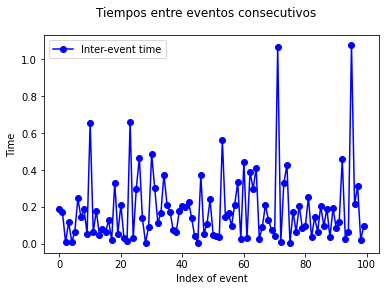

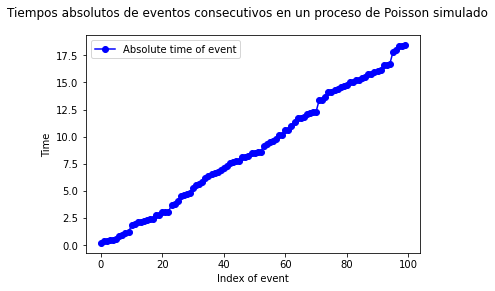

In [16]:
#tiempos de los eventos en el ciclo intermedio
fig = plt.figure()
fig.suptitle('Tiempos entre eventos consecutivos')
plot, = plt.plot(_event_num, _inter_event_times, 'bo-', label='Inter-event time')
plt.legend(handles=[plot])
plt.xlabel('Index of event')
plt.ylabel('Time')
plt.show()

#tiempos absolutos de los eventos
fig = plt.figure()
fig.suptitle('Tiempos absolutos de eventos consecutivos')
plot, = plt.plot(_event_num, _event_times, 'bo-', label='Absolute time of event')
plt.legend(handles=[plot])
plt.xlabel('Index of event')
plt.ylabel('Time')
plt.show()


INTERVAL_NUM,NUM_EVENTS
1,8
2,4
3,8
4,5
5,5
6,4
7,6
8,6
9,7
10,5
11,4
12,5
13,4
14,3
15,7
16,9
17,5
18,1
5.333333333333333


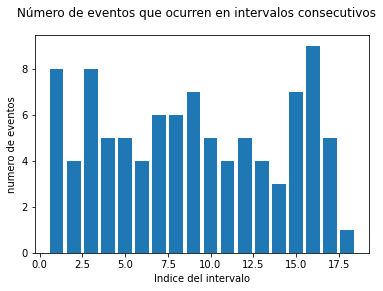

In [18]:
_interval_nums = []
_num_events_in_interval = []
_interval_num = 1
_num_events = 0

print('INTERVAL_NUM,NUM_EVENTS')

for i in range(len(_event_times)):
	_event_time = _event_times[i]
	if _event_time <= _interval_num:
		_num_events += 1
	else:
		_interval_nums.append(_interval_num)
		_num_events_in_interval.append(_num_events)

		print(str(_interval_num) +',' + str(_num_events))

		_interval_num += 1

		_num_events = 1

#print the mean number of events per unit time
print(statistics.mean(_num_events_in_interval))

#plot the number of events in consecutive intervals
fig = plt.figure()
fig.suptitle('Número de eventos que ocurren en intervalos consecutivos')
plt.bar(_interval_nums, _num_events_in_interval)
plt.xlabel('Indice del intervalo')
plt.ylabel('numero de eventos')
plt.show()

## Recomendaciones

In [ ]:
1. 